In [ ]:
#facerecoginiton with SVM
#dataset is present inside the wild dataset with labelled faces
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


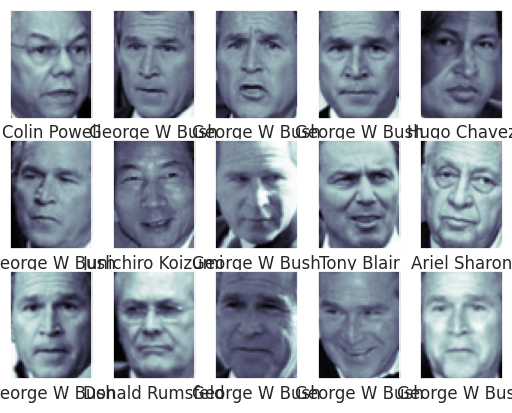

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns;sns.set()
fig,ax=plt.subplots(3,5)
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
pca=RandomizedPCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
model=make_pipeline(pca,svc)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(faces.data,faces.target,random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'svc__C':[1,5,10,15],'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid=GridSearchCV(model,param_grid)
%time grid.fit(Xtrain,ytrain)
print(grid.best_params_)

CPU times: user 59.1 s, sys: 42.9 s, total: 1min 42s
Wall time: 1min 3s
{'svc__C': 5, 'svc__gamma': 0.001}


In [ ]:
model=grid.best_estimator_
yfit=model.predict(Xtest)

Text(0.5, 0.98, 'predicted names:incorrect lables in red')

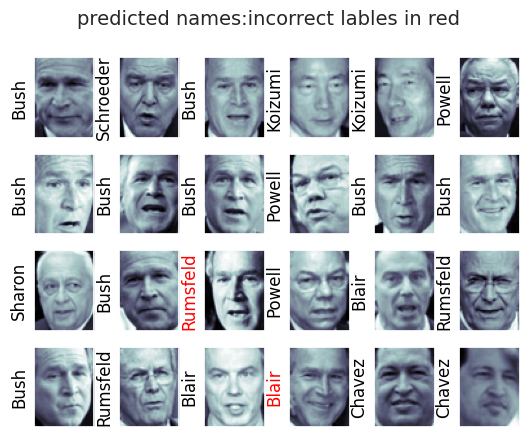

In [ ]:
fig,ax=plt.subplots(4,6)
for i,axi in enumerate(ax.flat):
  axi.imshow(Xtest[i].reshape(62,47),cmap='bone')
  axi.set(xticks=[],yticks=[])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='black'if yfit[i]==ytest[i] else 'red')
fig.suptitle('predicted names:incorrect lables in red',size=14)